# <center><font color='MAROON'>Traffic Sign Recognition Classifier</font></center>

---

<font color='maroon'>Source Code is available at Github:  </font>

https://github.com/Junth19/Traffic-Signs-Recognition-System

<font color='maroon'>Training visualization and saved model  is available at:  </font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier?workspace=user-junth

---

## <font color='crimson'>Installing and Importing Dependencies</font>

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import seaborn as sns
import numpy as np
import os
import math
import keras
import wandb

Using TensorFlow backend.


## <font color='crimson'>Importing GTSRB - German Traffic Sign Recognition Benchmark Datasets</font>


<font color='maroon'>Dataset for this project is available at:</font>

https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [2]:
current_path = os.getcwd()
print(current_path)

C:\Users\junth\Traffic-Signs-Recognition-System


In [3]:
classes_name = ['Speed limit (20km/h)',
                'Speed limit (30km/h)', 
                'Speed limit (50km/h)', 
                'Speed limit (60km/h)', 
                'Speed limit (70km/h)', 
                'Speed limit (80km/h)', 
                'End of speed limit (80km/h)', 
                'Speed limit (100km/h)', 
                'Speed limit (120km/h)', 
                'No passing', 
                'No passing veh over 3.5 tons', 
                'Right-of-way at intersection', 
                'Priority road', 
                'Yield', 
                'Stop', 
                'No vehicles', 
                'Veh > 3.5 tons prohibited', 
                'No entry', 
                'General caution', 
                'Dangerous curve left', 
                'Dangerous curve right', 
                'Double curve', 
                'Bumpy road', 
                'Slippery road', 
                'Road narrows on the right', 
                'Road work', 
                'Traffic signals', 
                'Pedestrians', 
                'Children crossing', 
                'Bicycles crossing', 
                'Beware of ice/snow',
                'Wild animals crossing', 
                'End speed + passing limits', 
                'Turn right ahead', 
                'Turn left ahead', 
                'Ahead only', 
                'Go straight or right', 
                'Go straight or left', 
                'Keep right', 
                'Keep left', 
                'Roundabout mandatory', 
                'End of no passing', 
                'End no passing veh > 3.5 tons' 
               ]

In [4]:
path = os.path.join(current_path,'Training Image Plot')
images = os.listdir(path)
training_image_plot = []
for image in images:
    img = mpimg.imread(path + './' + image)
    training_image_plot.append(img)

100%|██████████| 43/43 [00:28<00:00,  1.53it/s]


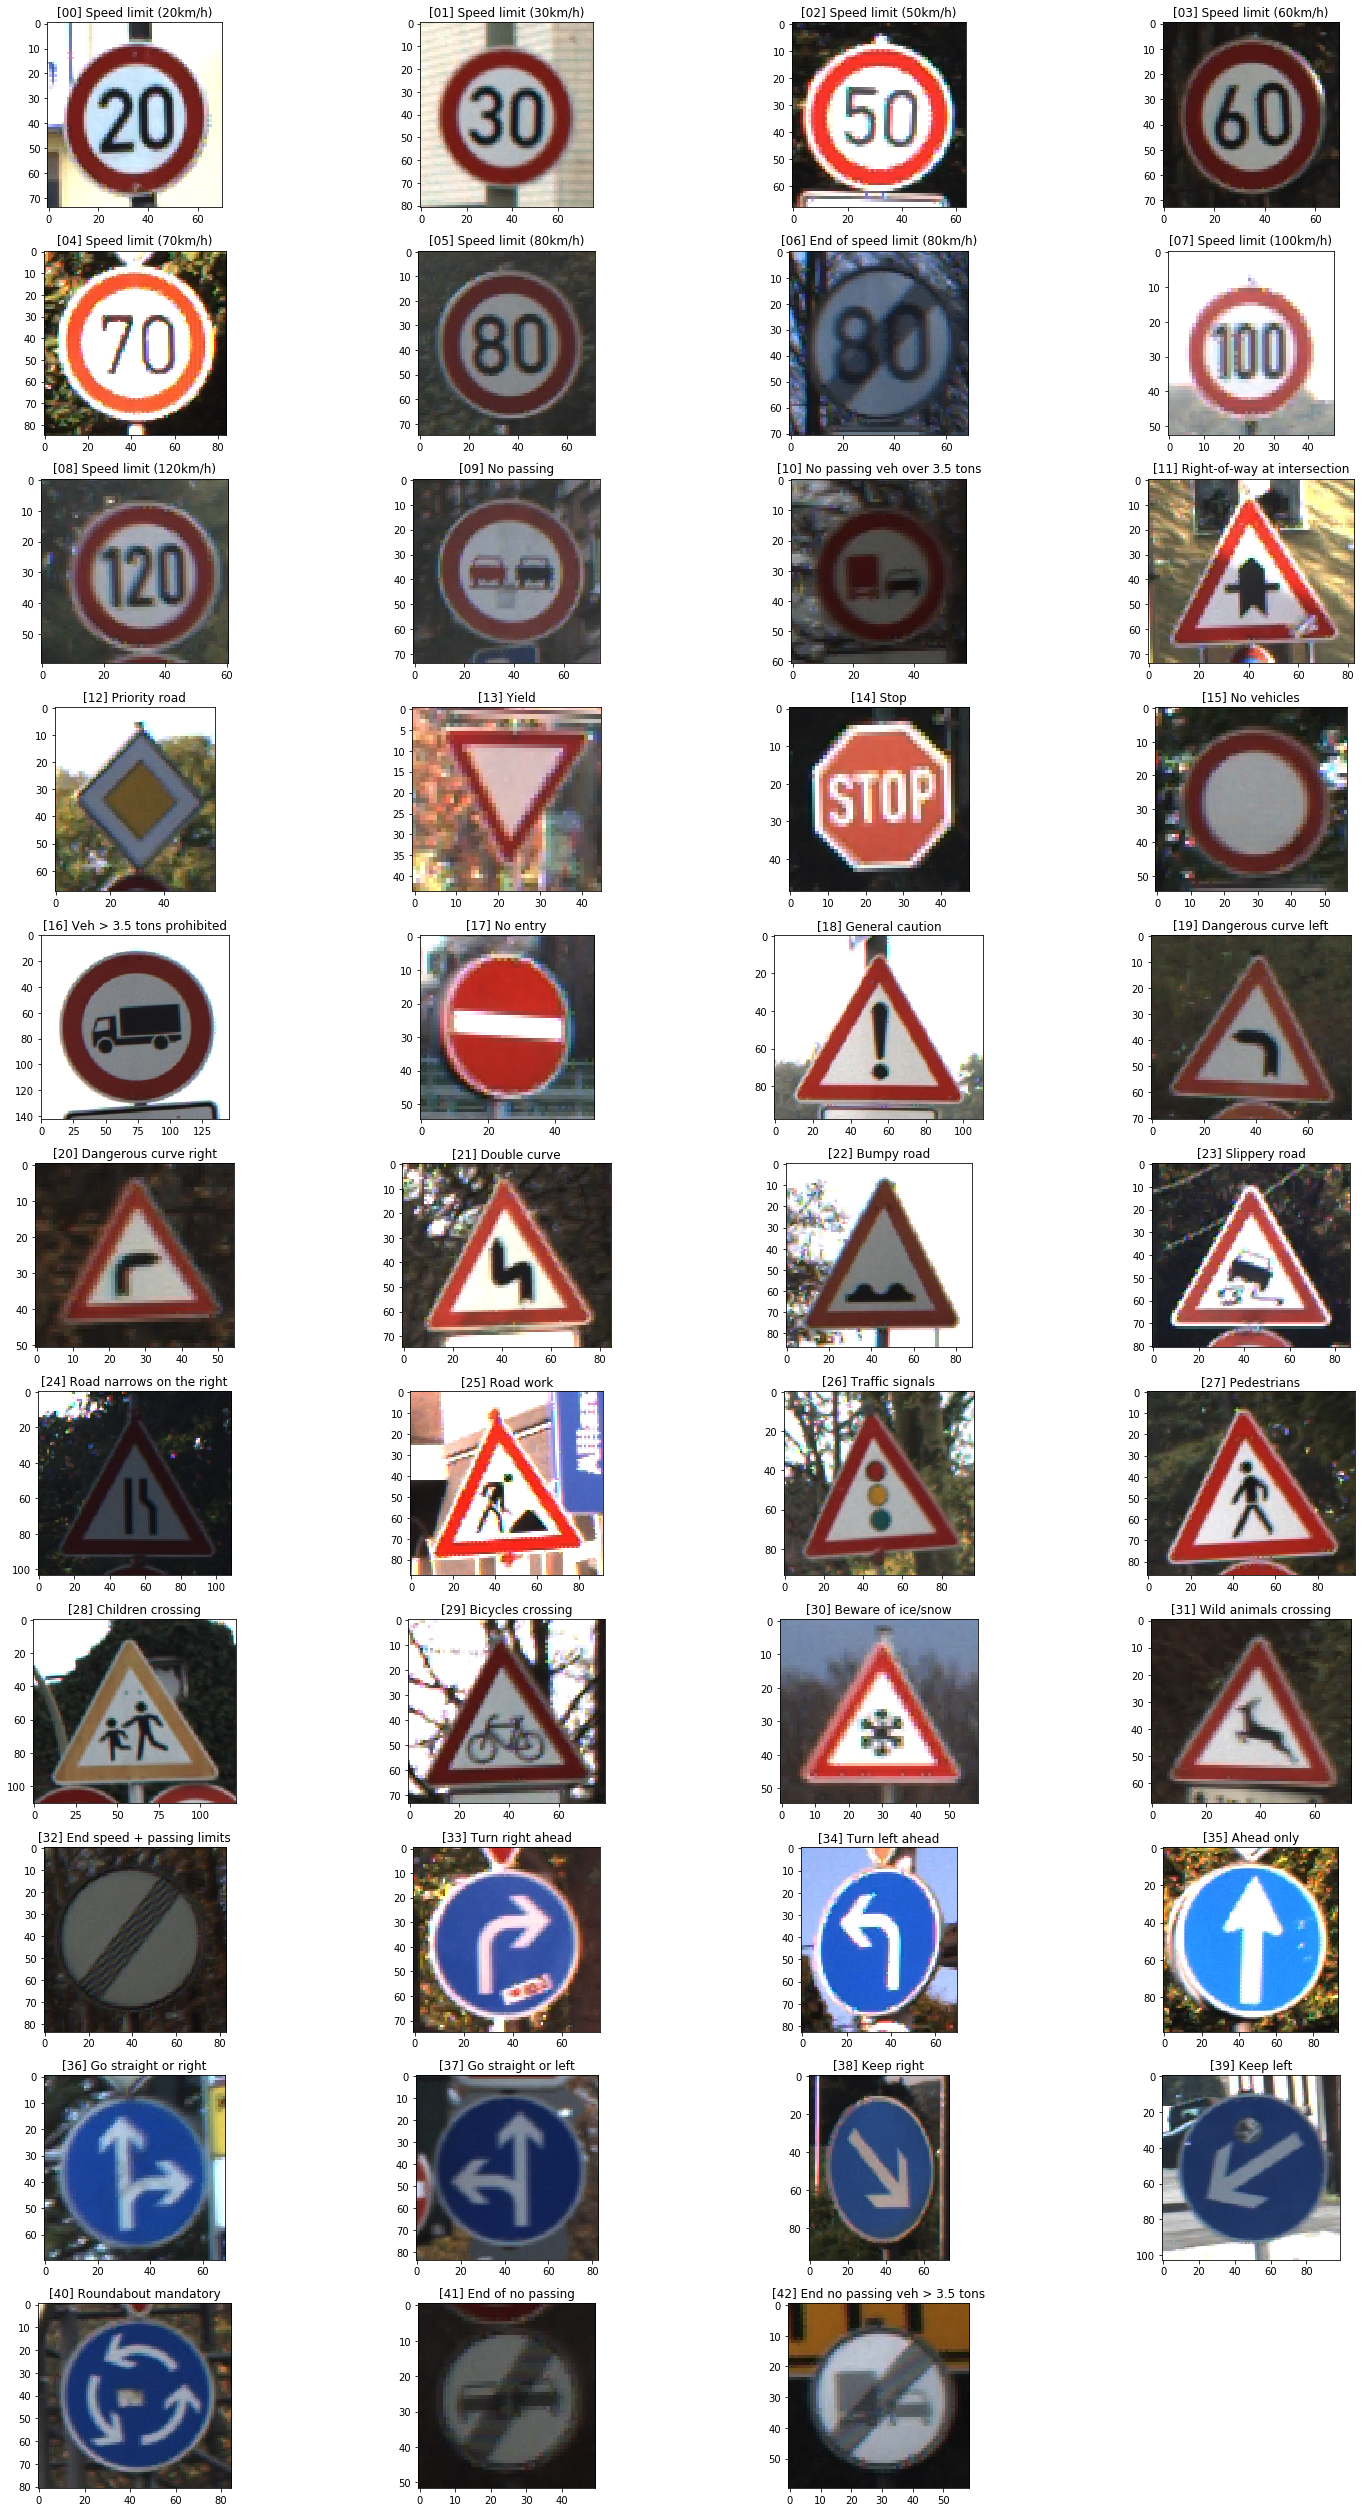

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(22,35))
for i in tqdm(range(len(training_image_plot))):
    ax = fig.add_subplot(int(len(training_image_plot) / 4) + 1, 4, i + 1) 
    ax.imshow(training_image_plot[i], interpolation='none')
    plt.title("[%02d] %s" % (i, classes_name[i]))
    plt.tight_layout()
#plt.savefig('Original_Training_Image_Plot.png', dpi = 300)

In [6]:
training_data = []
training_labels = []
classes = 43
label_distribution = {}

for i in tqdm(range(classes)):
    path = os.path.join(current_path,'gtsrb-german-traffic-sign','train',str(i))
    images = os.listdir(path)
    label_distribution[classes_name[i]] = len(images)
    
    for traffic_sign in images:
        try:
            image = Image.open(path + '\\'+ traffic_sign)
            image = image.resize((32,32))
            image = np.array(image)
            
            training_data.append(image)
            training_labels.append(i)
        except:
            print("Error Loading Image!")
    
print(label_distribution)

100%|██████████| 43/43 [02:14<00:00,  3.14s/it]

{'Speed limit (20km/h)': 210, 'Speed limit (30km/h)': 2220, 'Speed limit (50km/h)': 2250, 'Speed limit (60km/h)': 1410, 'Speed limit (70km/h)': 1980, 'Speed limit (80km/h)': 1860, 'End of speed limit (80km/h)': 420, 'Speed limit (100km/h)': 1440, 'Speed limit (120km/h)': 1410, 'No passing': 1470, 'No passing veh over 3.5 tons': 2010, 'Right-of-way at intersection': 1320, 'Priority road': 2100, 'Yield': 2160, 'Stop': 780, 'No vehicles': 630, 'Veh > 3.5 tons prohibited': 420, 'No entry': 1110, 'General caution': 1200, 'Dangerous curve left': 210, 'Dangerous curve right': 360, 'Double curve': 330, 'Bumpy road': 390, 'Slippery road': 510, 'Road narrows on the right': 270, 'Road work': 1500, 'Traffic signals': 600, 'Pedestrians': 240, 'Children crossing': 540, 'Bicycles crossing': 270, 'Beware of ice/snow': 450, 'Wild animals crossing': 780, 'End speed + passing limits': 240, 'Turn right ahead': 689, 'Turn left ahead': 420, 'Ahead only': 1200, 'Go straight or right': 390, 'Go straight or le

##  <font color='crimson'>Exploring Data</font>

### <font color='maroon'>Label Distribution</font>

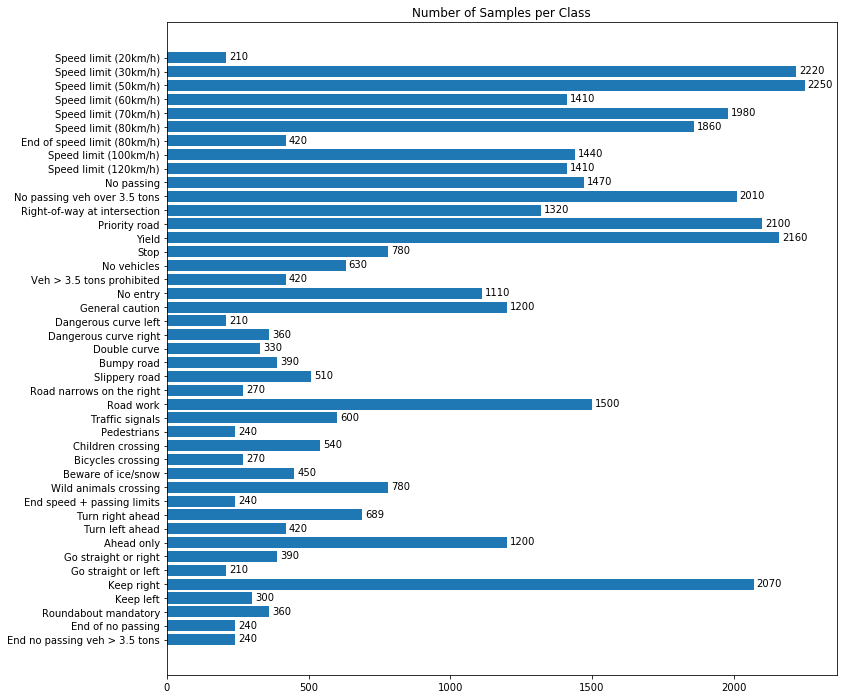

In [7]:
## Display label distribution in a histogram

fig, ax = plt.subplots(figsize=(12,12))
value_count = list(label_distribution.values())
plot_labels = list(label_distribution.keys())
y_pos = np.arange(len(label_distribution))

ax.barh(y_pos, value_count, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_labels)
ax.invert_yaxis()
ax.set_title('Number of Samples per Class')

for i, v in enumerate(value_count):
    ax.text(v + 10, i + 0.15, str(v), color='black')
#plt.savefig("./Original_Label_Distribution.png", dpi = 300)
plt.show()

In [8]:
sign_count = value_count
class_id = np.arange(43)

In [9]:
list_labels = ['classID', "TrafficSignName", 'SignCount']
list_cols = [class_id, classes_name, sign_count]
zipped = list(zip(list_labels, list_cols))
dict_data = dict(zipped)
traffic_signs = pd.DataFrame(dict_data)
traffic_signs.index = traffic_signs['classID']
cols = ['TrafficSignName', "SignCount"]
traffic_signs = traffic_signs[cols]

In [10]:
out_csv = 'traffic_signs.csv'
traffic_signs.to_csv(out_csv)

In [11]:
cm = sns.light_palette("green", as_cmap=True)
traffic_signs_styled = traffic_signs.style.set_caption('Traffic Sign Data Styled using Colormap...')\
    .background_gradient(cmap=cm)
traffic_signs_styled

In [12]:
#Converting lists into numpy arrays
training_data = np.array(training_data)
training_labels = np.array(training_labels)
print("Data Shape:\n{0}".format(training_data.shape))
print("Labels Shape:\n{0}".format(training_labels.shape))

Data Shape:
(39209, 32, 32, 3)
Labels Shape:
(39209,)


# <center><font color='DARKMAGENTA'>Image Preprocessing</font></center>
---

In [13]:
from sklearn.utils import shuffle
training_data, training_labels = shuffle(training_data, training_labels, random_state = 113)
X_train = training_data
y_train = training_labels

In [14]:
print("         Shape of X_train, y_train")
print("--------------------------------------------")
print("      X_train                     y_train\n{0}                {1}".format(X_train.shape, y_train.shape))
print("*********************************************")

         Shape of X_train, y_train
--------------------------------------------
      X_train                     y_train
(39209, 32, 32, 3)                (39209,)
*********************************************


In [15]:
def ImageReader(define_path):
    data = []
    path = os.path.join(current_path,'gtsrb-german-traffic-sign',define_path)
    images = os.listdir(path)

    for traffic_sign in tqdm(images):
        try:
            image = Image.open(path + '\\'+ traffic_sign)
            image = image.resize((32,32))
            image = np.array(image)

            data.append(image)
        except:
            print("Error Loading Image!")
    return data

In [16]:
test_images = ImageReader('test')
X_test = np.array(test_images)
print("      X_test                      \n{0}                ".format(X_test.shape))

100%|██████████| 12630/12630 [01:23<00:00, 150.52it/s]


      X_test                      
(12630, 32, 32, 3)                


In [17]:
print("Number of training examples =", len(X_train))
print("Number of testing examples =", len(X_test))
print("Image data shape =", training_data[0].shape)
print("Number of labels/classes =", len(classes_name))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of labels/classes = 43


## <font color='crimson'>1. Contrast Limited Adaptive Histogram Equalization (CLAHE)</font>

---

<font color='maroon'>An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.</font>

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist

<font color='maroon'>Clipping limit, normalized between 0 and 1 (higher values give more contrast).</font>

---

In [18]:
from skimage import data, img_as_float
from skimage import exposure

In [19]:
# Function that applies normalization and local contrast enhancement

def normalize(image_data):
    
    """An algorithm for local contrast enhancement, that uses histograms computed over 
    different tile regions of the image. Local details can therefore be enhanced even in 
    regions that are darker or lighter than most of the image."""
    
    norm = np.array([exposure.equalize_adapthist(image, clip_limit=0.1) for image in tqdm(image_data)])
    return norm

In [20]:
# Run the normalization process

print('Normalizing Training Images...')
X_train_norm = normalize(X_train)

print('\nNormalizing Test Images...')
X_test_norm = normalize(X_test)

print('\nNormaliztion Complete.')

  0%|          | 0/39209 [00:00<?, ?it/s]C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
  0%|          | 1/39209 [00:00<1:11:17,  9.17it/s]

Normalizing Training Images...


  0%|          | 6/12630 [00:00<03:46, 55.69it/s]


Normalizing Test Images...


100%|██████████| 12630/12630 [04:01<00:00, 52.31it/s]



Normaliztion Complete.


In [21]:
print('Normalizing Training Images for visualisation...')
training_image_plot_norm = normalize(training_image_plot)

  0%|          | 0/43 [00:00<?, ?it/s]C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to float32
  .format(dtypeobj_in, dtypeobj_out))
  5%|▍         | 2/43 [00:00<00:02, 16.85it/s]

Normalizing Training Images for visualisation...


100%|██████████| 43/43 [00:01<00:00, 40.40it/s]


100%|██████████| 43/43 [00:21<00:00,  1.99it/s]


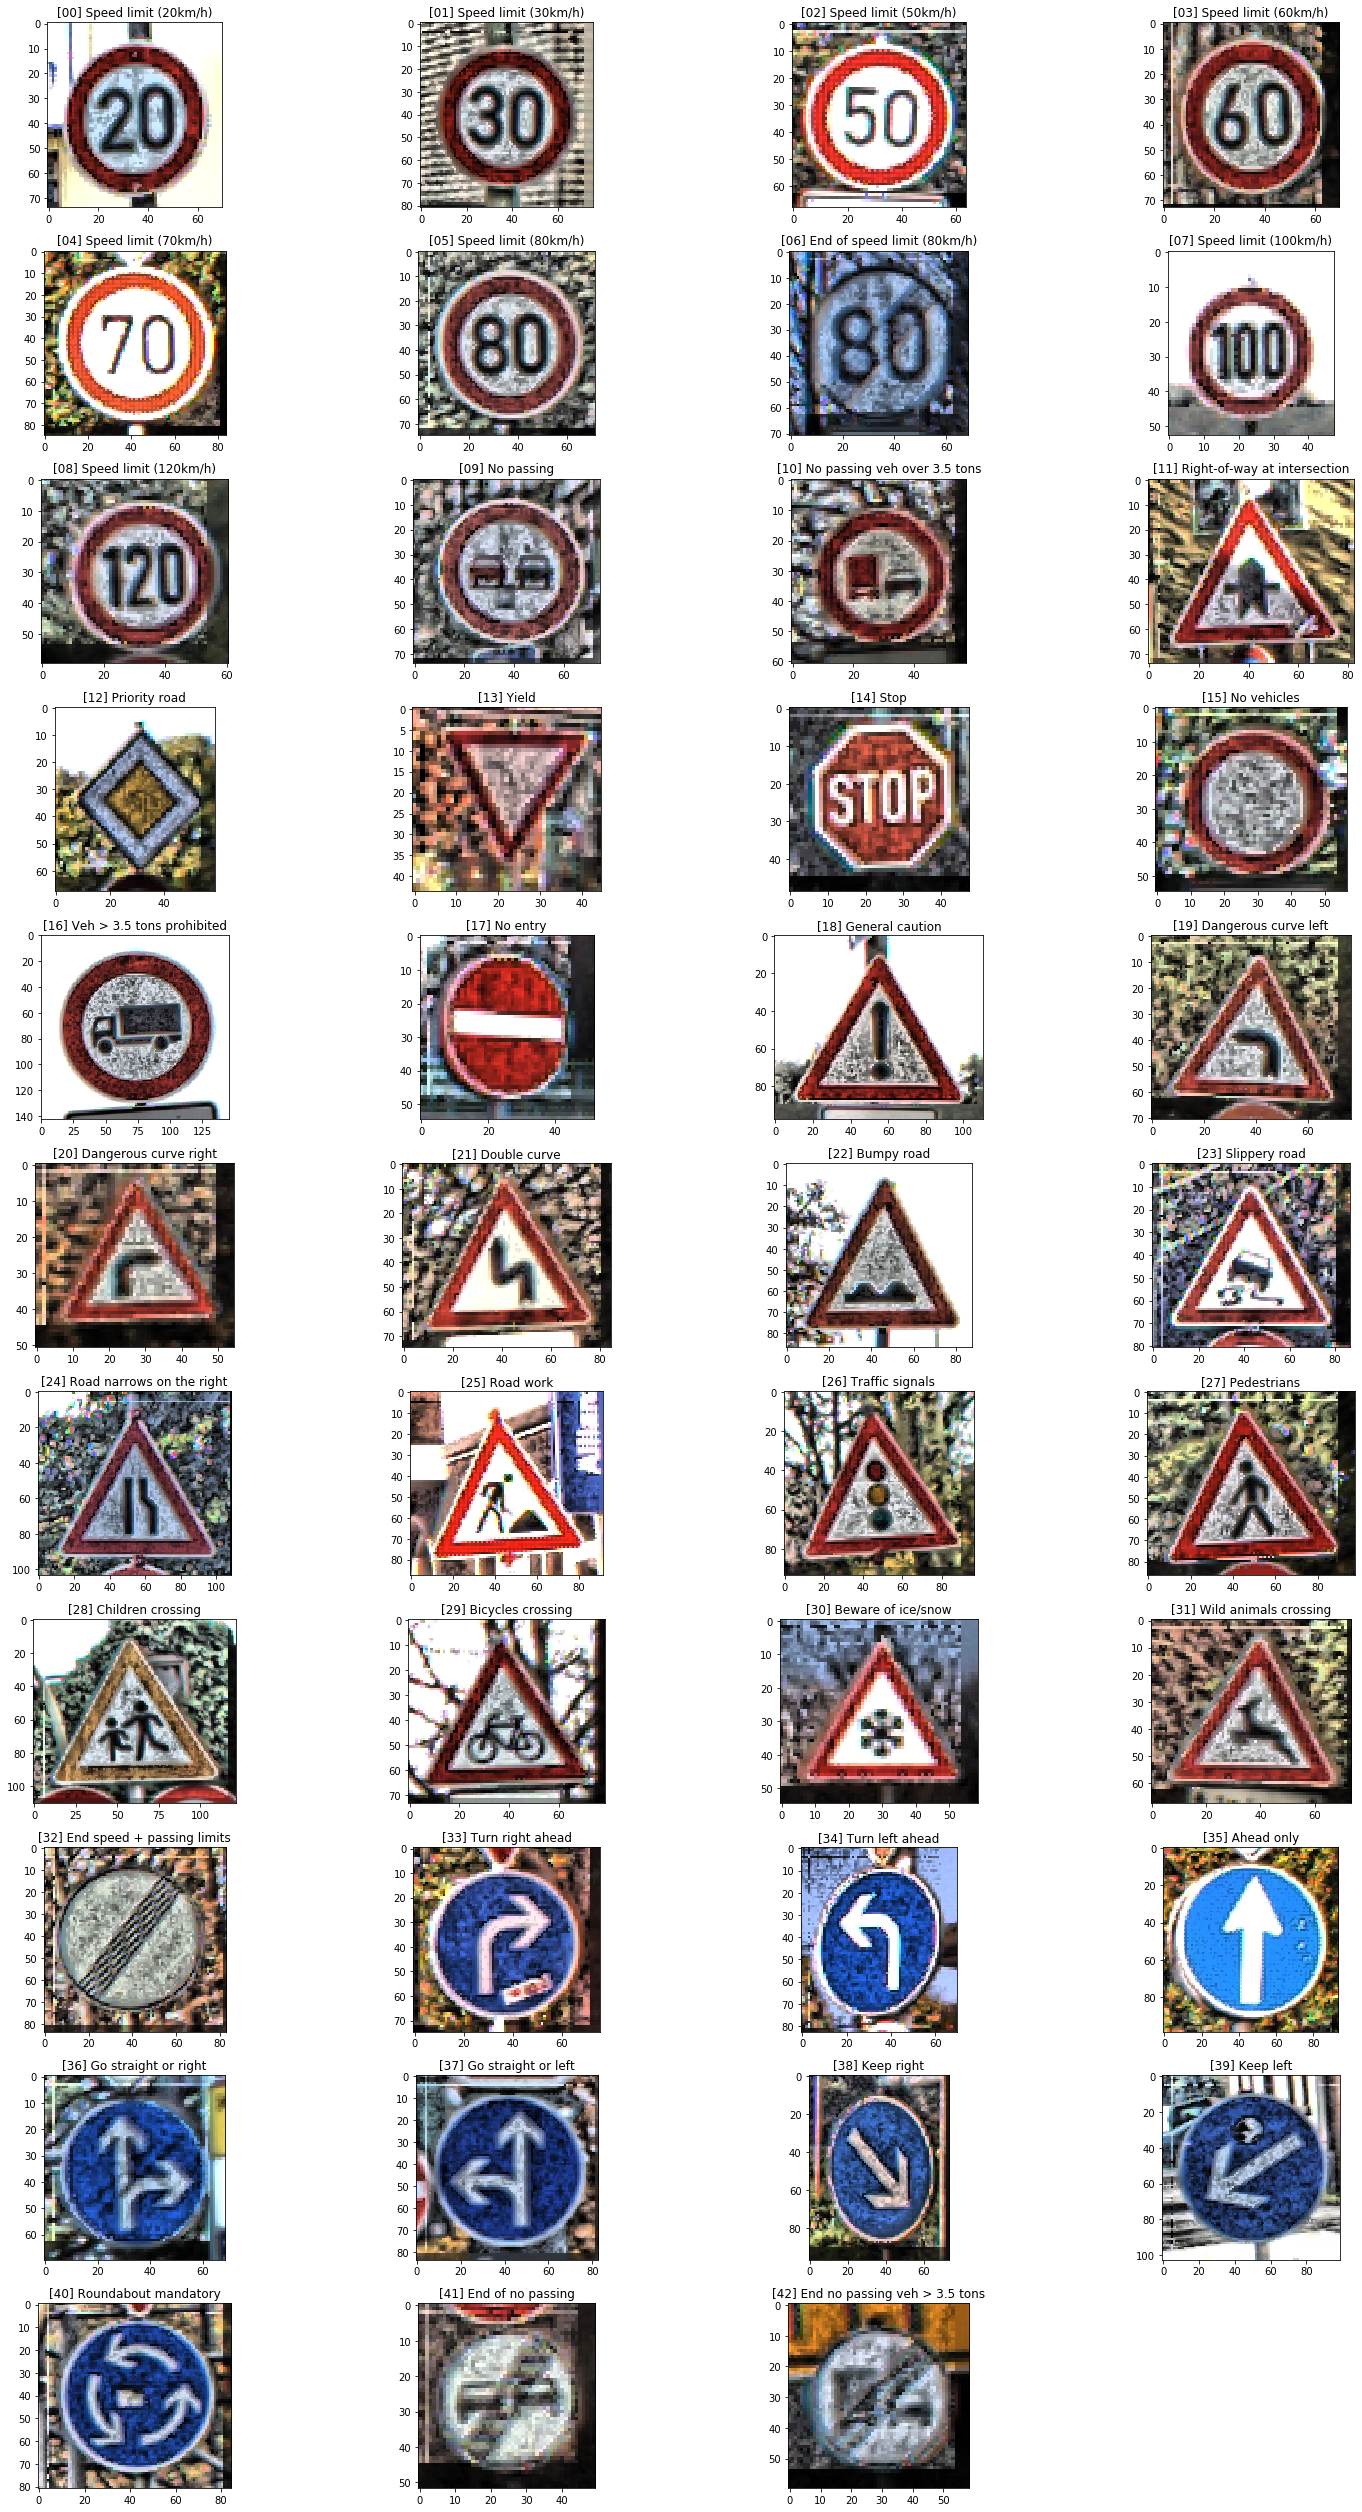

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(22,35))
for i in tqdm(range(len(training_image_plot_norm))):
    ax = fig.add_subplot(int(len(training_image_plot_norm) / 4) + 1, 4, i + 1) 
    ax.imshow(training_image_plot_norm[i], interpolation='none')
    plt.title("[%02d] %s" % (i, classes_name[i]))
    plt.tight_layout()
#plt.savefig('Normalized_Training_Image_Plot.png', dpi = 300)

C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


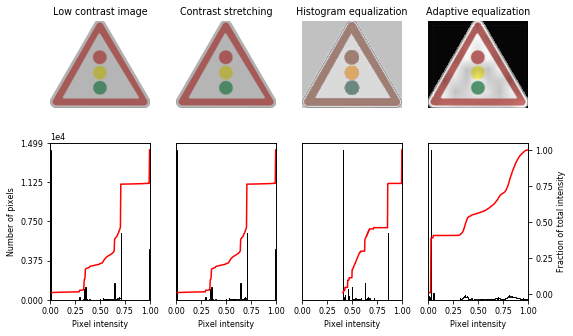

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Loading Demonstration Image
path = os.path.join(current_path,'Demonstration')
img = mpimg.imread(path + './low_contrast_image.png')

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()
#fig.savefig('Adaptive_Equalization.png', dpi = 500)

## <font color='crimson'>2. Image Augmentation</font>
---

### <font color='brown'>ImageDataGenerator class</font>

<font color='MEDIUMSLATEBLUE'>Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).</font>


---
<font color='MEDIUMSLATEBLUE'>1. Augmentation Version 1 - 3000 Images per Class</font>

<font color='MEDIUMSLATEBLUE'>2. Augmentation Version 2 - 4500 Images per Class</font>

---


In [24]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# Transformations applied to RBG training images
datagen = keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
    )

C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [26]:
## Create AUGMENTED training sets

from sklearn.utils import shuffle

n_labels = len(classes_name)
max_images_per_class = 2500
X_train_aug = np.empty((0, 32, 32, 3))
y_train_aug = np.empty(0, dtype='uint8')

print('Augmenting Image Data...')
for i in tqdm(range(n_labels)):
    
    i_class_images = X_train_norm[y_train == i]
    i_class_y = y_train[y_train == i]

    i_X_train_aug = np.copy(i_class_images)
    i_y_train_aug = np.copy(i_class_y)
    
    for X,y in (datagen.flow(i_class_images, i_class_y, batch_size=len(i_class_y), seed=113 + i * 17)):
        
        i_X_train_aug = np.append(i_X_train_aug, X, axis=0)
        i_y_train_aug = np.append(i_y_train_aug, y, axis=0)
        
        if len(i_X_train_aug) >= max_images_per_class:
            break
            
    X_train_aug = np.append(X_train_aug, i_X_train_aug[:max_images_per_class], axis=0)
    y_train_aug = np.append(y_train_aug, i_y_train_aug[:max_images_per_class], axis=0)
    
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=113)
print('Augmentation Complete.')



  0%|          | 0/43 [00:00<?, ?it/s]C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\junth\Anaconda3\envs\Traffic Sign Recognition System\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Augmenting Image Data...


100%|██████████| 43/43 [02:42<00:00,  3.79s/it]


Augmentation Complete.


In [27]:
print('New number of training images: ', X_train_aug.shape[0])
print('Verifing Image Shape: ', X_train_aug.shape[1:])

New number of training images:  107500
Verifing Image Shape:  (32, 32, 3)


100%|██████████| 43/43 [00:21<00:00,  2.02it/s]


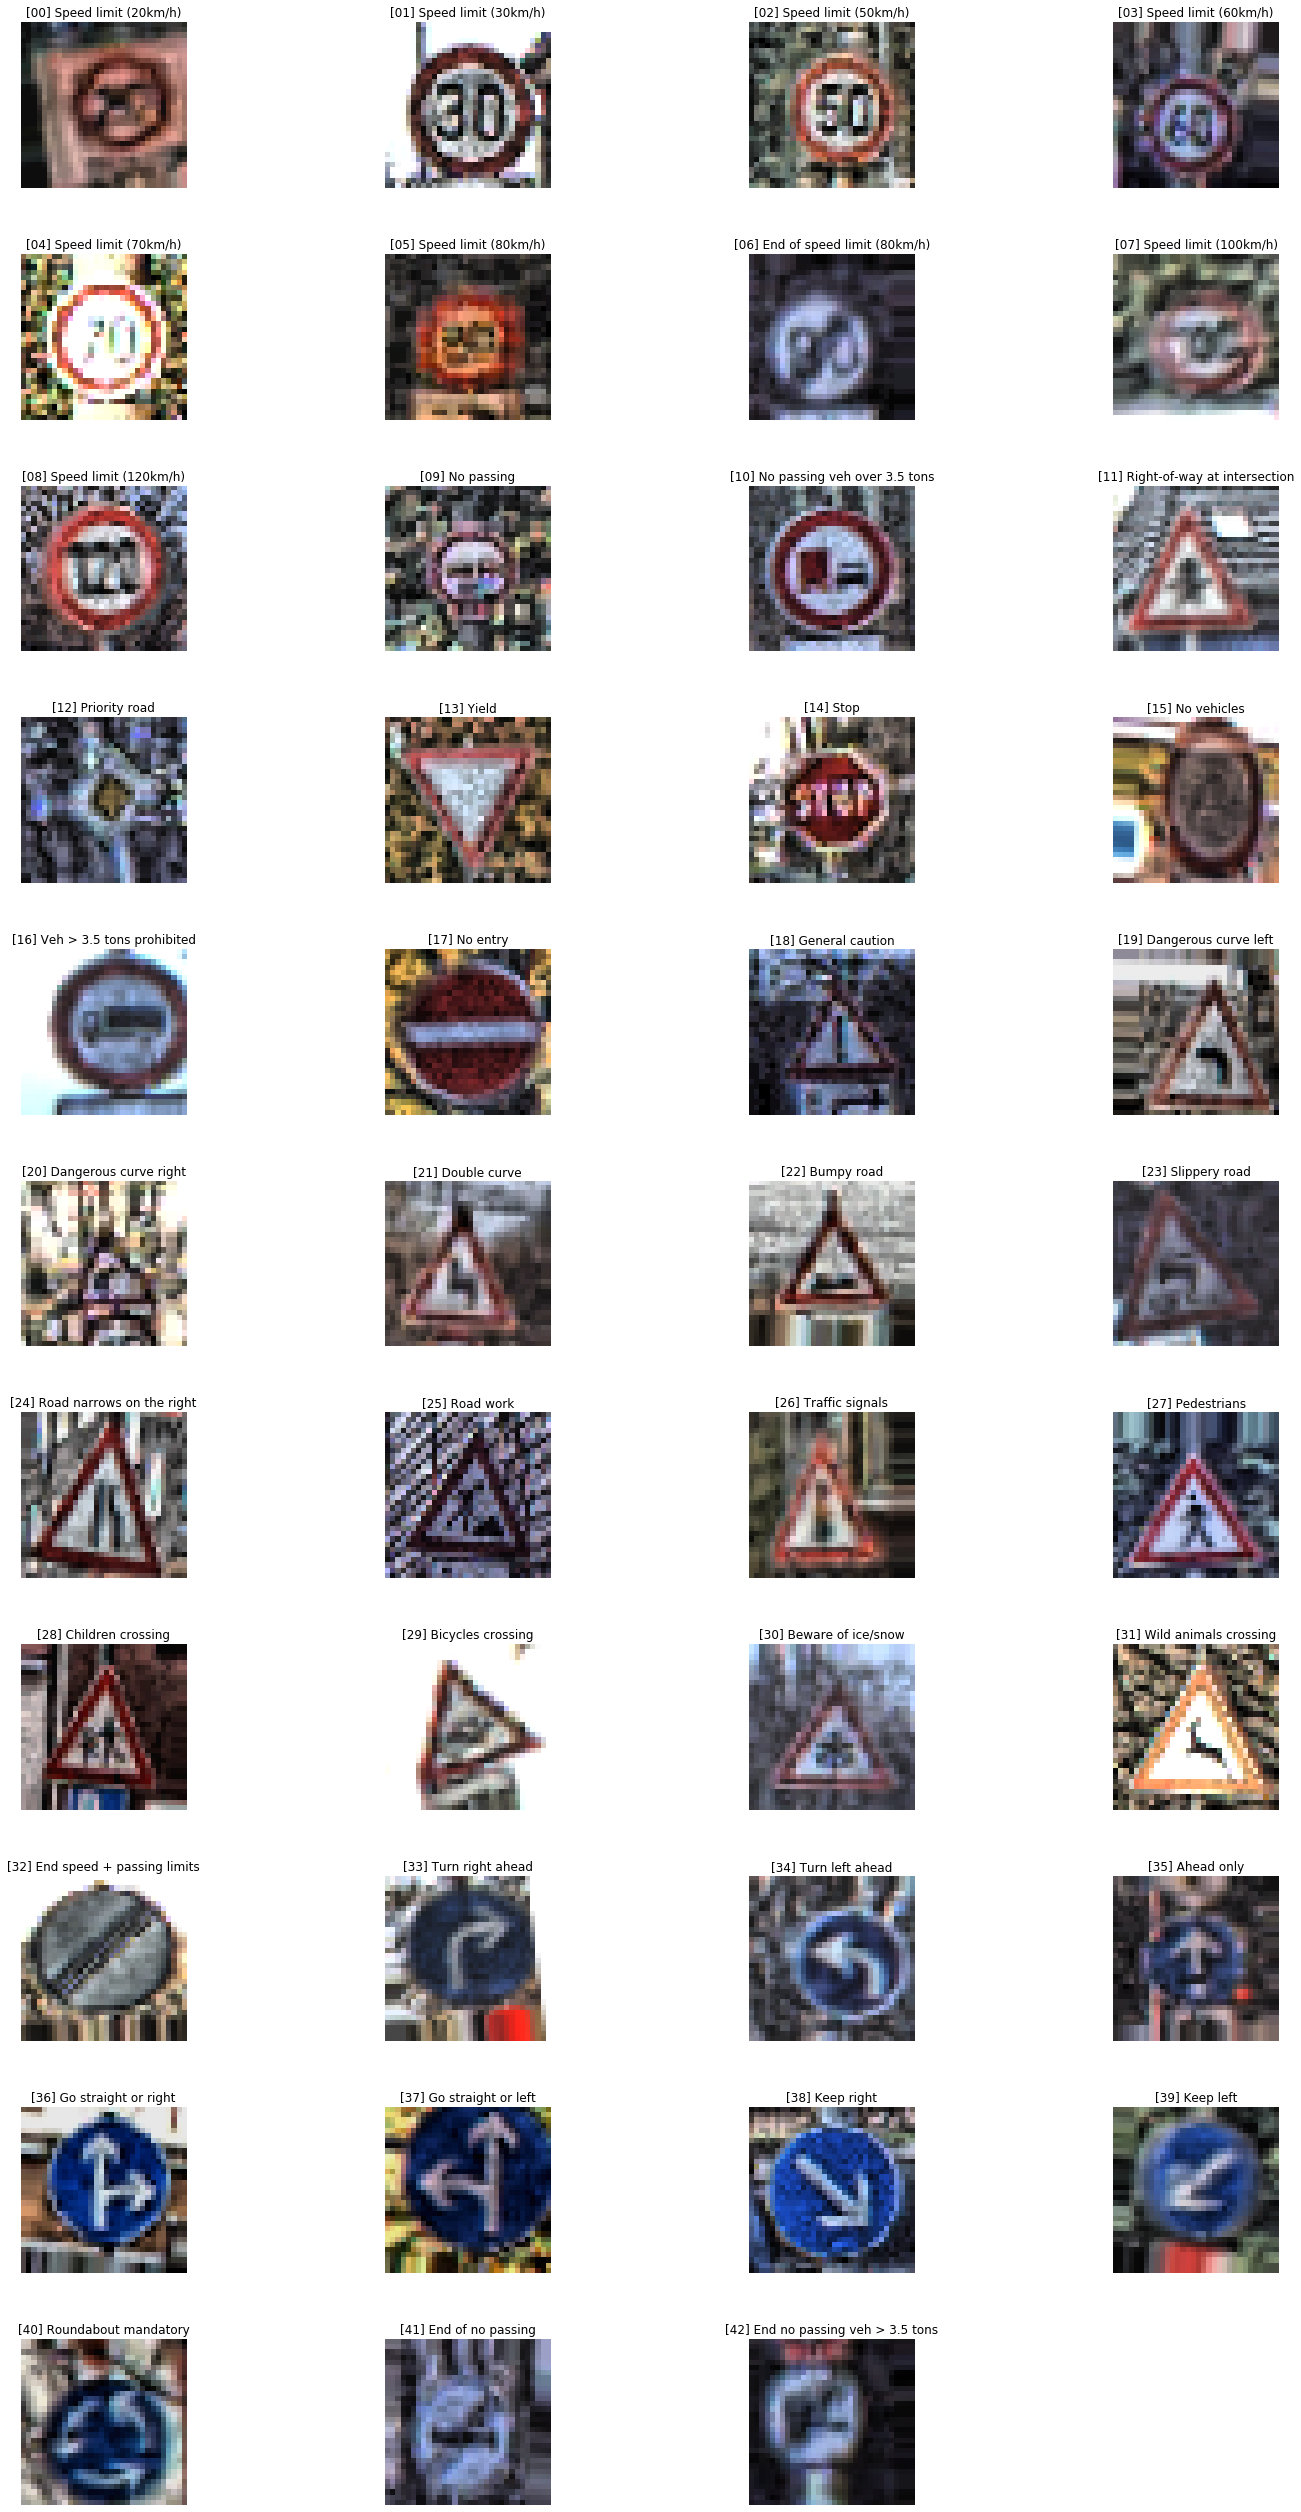

In [28]:
## Display sample of the AUGMENTED training images, 1 image for each class

%matplotlib inline
fig = plt.figure(figsize=(22,35), tight_layout={'h_pad':5})
for i in tqdm(range(n_labels)):
    image_key = np.where(y_train_aug == i)
    img = X_train_aug[image_key[0][0]]
    ax = fig.add_subplot(int(n_labels / 4) + 1, 4, i + 1) 
    ax.imshow(img, interpolation='none')
    plt.title("[%02d] %s" % (i, classes_name[i]))
    plt.axis('off')
    plt.tight_layout()
#plt.savefig('Augmented_Training_Image_Plot.png', dpi = 300)

In [29]:
# Create image dictionary {label:images}

train_images_dict = dict()

for i, (image, label) in enumerate(zip(X_train_aug, y_train_aug)):
    if label not in train_images_dict:
        train_images_dict[label] = []
    train_images_dict[label].append(image)

In [30]:
# Verifying correctness of number of images
sum(len(v) for v in train_images_dict.values())

107500

  0%|          | 0/43 [00:00<?, ?it/s]

[0] Speed limit (20km/h)


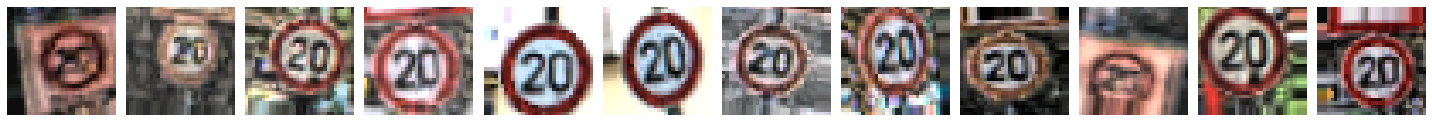

  2%|▏         | 1/43 [00:00<00:32,  1.29it/s]

[1] Speed limit (30km/h)


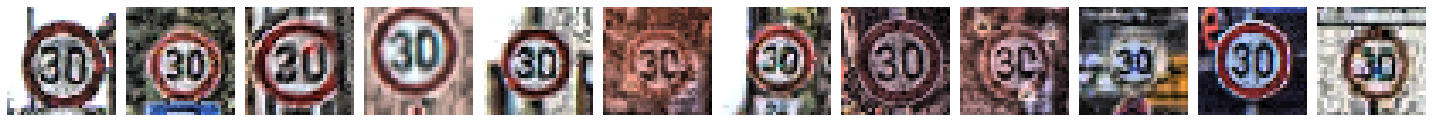

  5%|▍         | 2/43 [00:01<00:29,  1.39it/s]

[2] Speed limit (50km/h)


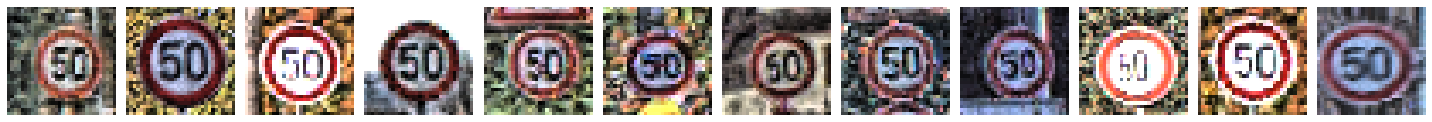

  7%|▋         | 3/43 [00:01<00:27,  1.47it/s]

[3] Speed limit (60km/h)


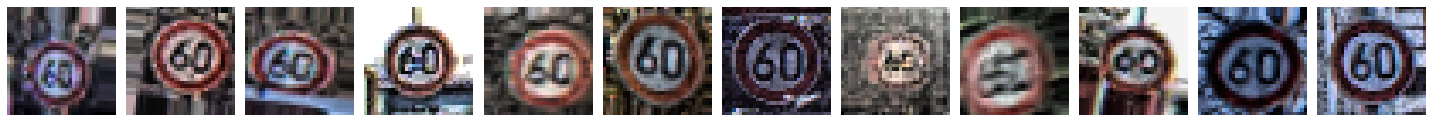

  9%|▉         | 4/43 [00:02<00:29,  1.33it/s]

[4] Speed limit (70km/h)


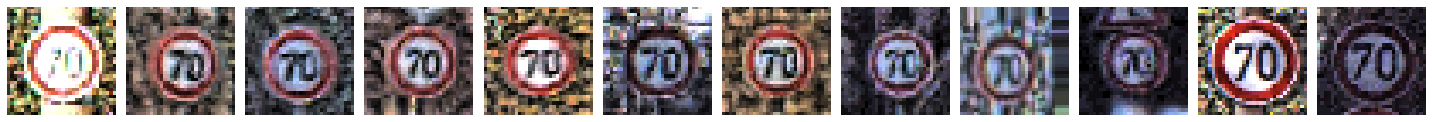

 12%|█▏        | 5/43 [00:03<00:26,  1.43it/s]

[5] Speed limit (80km/h)


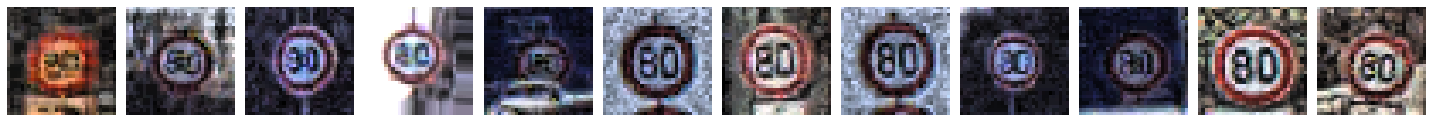

 14%|█▍        | 6/43 [00:04<00:24,  1.52it/s]

[6] End of speed limit (80km/h)


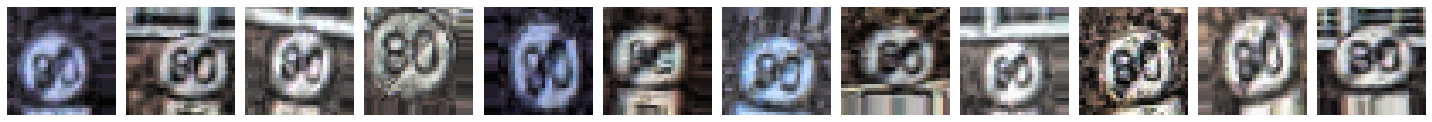

 16%|█▋        | 7/43 [00:04<00:22,  1.58it/s]

[7] Speed limit (100km/h)


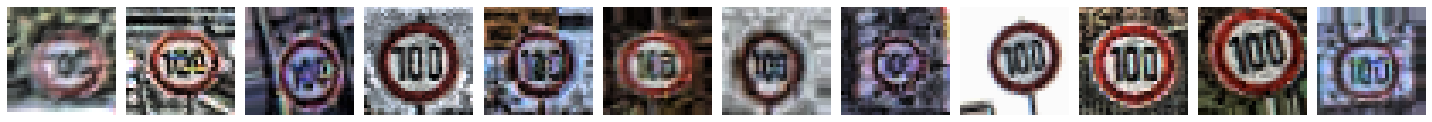

 19%|█▊        | 8/43 [00:05<00:22,  1.58it/s]

[8] Speed limit (120km/h)


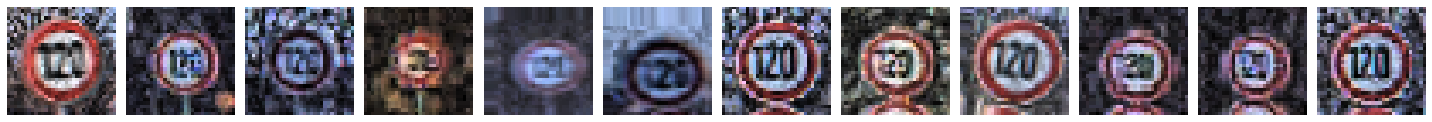

 21%|██        | 9/43 [00:05<00:20,  1.63it/s]

[9] No passing


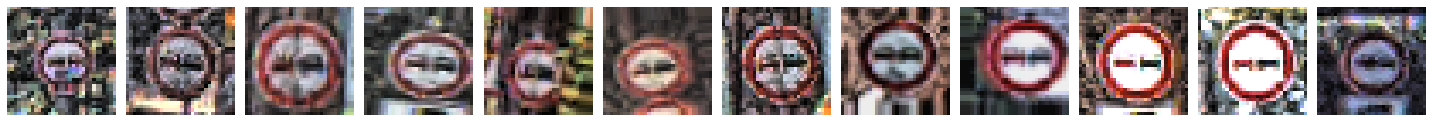

 23%|██▎       | 10/43 [00:06<00:21,  1.53it/s]

[10] No passing veh over 3.5 tons


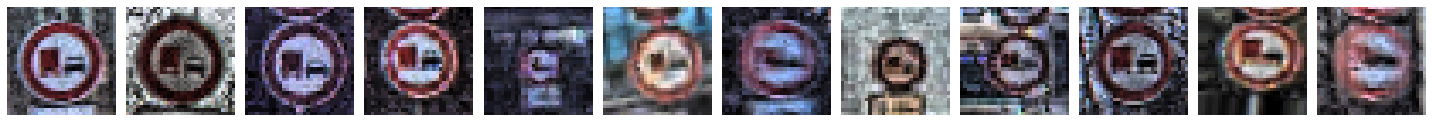

 26%|██▌       | 11/43 [00:07<00:20,  1.59it/s]

[11] Right-of-way at intersection


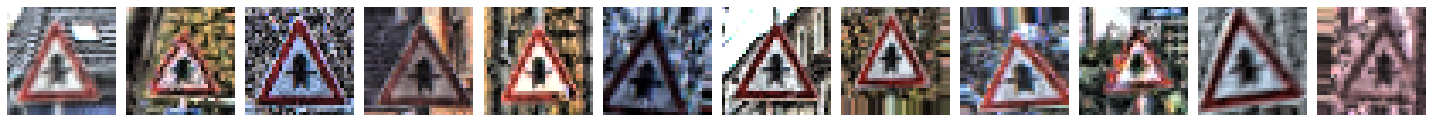

 28%|██▊       | 12/43 [00:07<00:18,  1.65it/s]

[12] Priority road


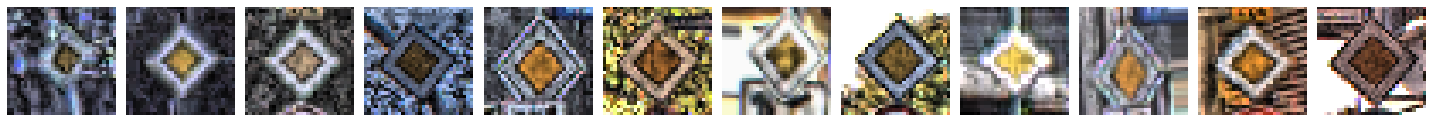

 30%|███       | 13/43 [00:08<00:17,  1.70it/s]

[13] Yield


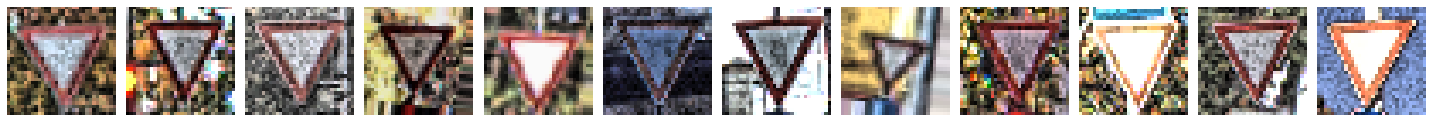

 33%|███▎      | 14/43 [00:08<00:16,  1.71it/s]

[14] Stop


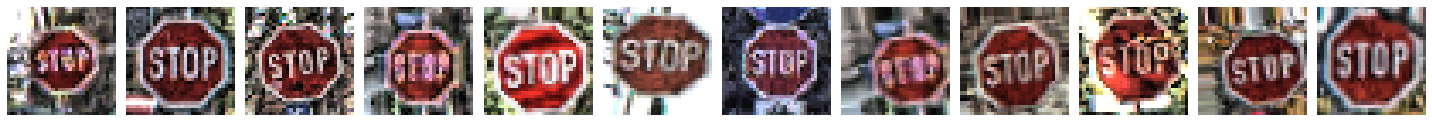

 35%|███▍      | 15/43 [00:09<00:18,  1.48it/s]

[15] No vehicles


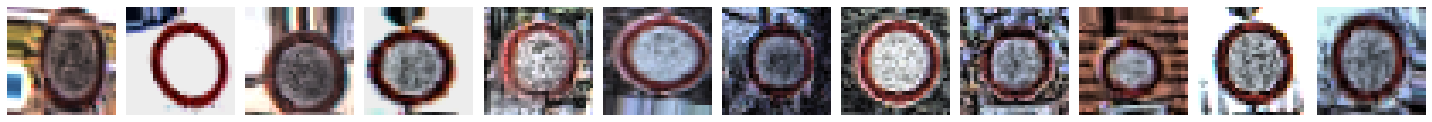

 37%|███▋      | 16/43 [00:10<00:18,  1.49it/s]

[16] Veh > 3.5 tons prohibited


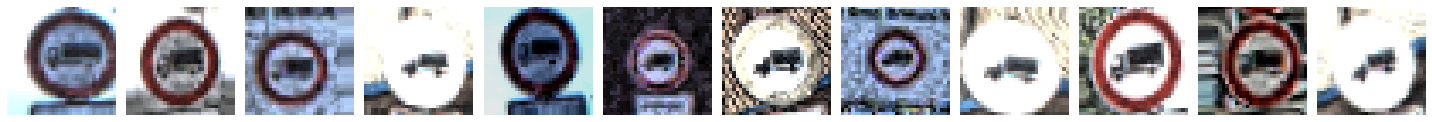

 40%|███▉      | 17/43 [00:11<00:17,  1.46it/s]

[17] No entry


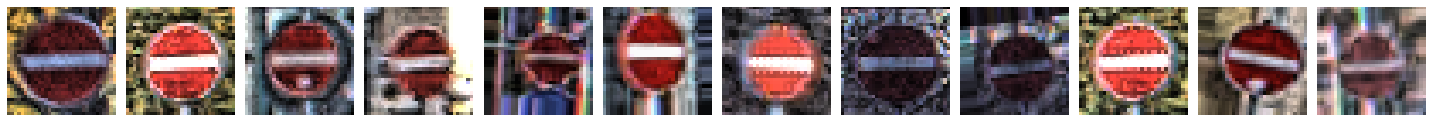

 42%|████▏     | 18/43 [00:11<00:17,  1.44it/s]

[18] General caution


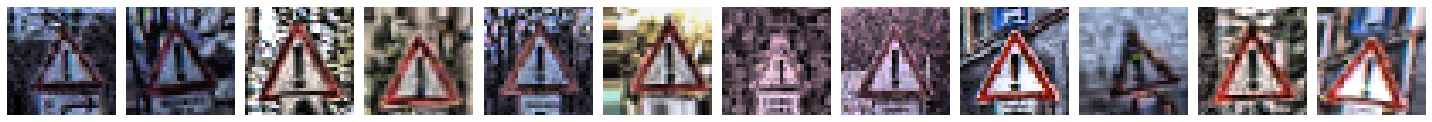

 44%|████▍     | 19/43 [00:12<00:15,  1.51it/s]

[19] Dangerous curve left


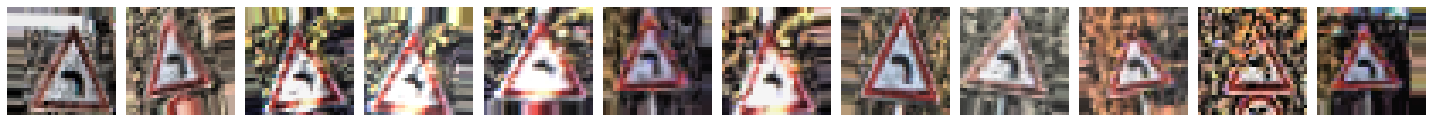

 47%|████▋     | 20/43 [00:13<00:16,  1.37it/s]

[20] Dangerous curve right


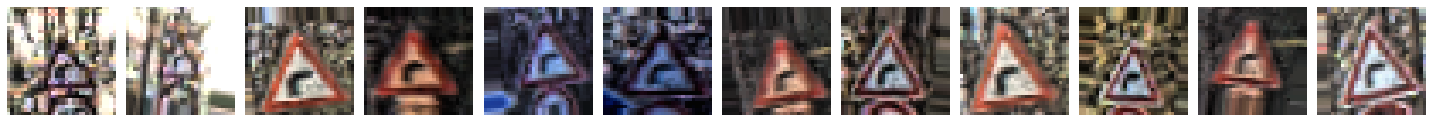

 49%|████▉     | 21/43 [00:14<00:17,  1.25it/s]

[21] Double curve


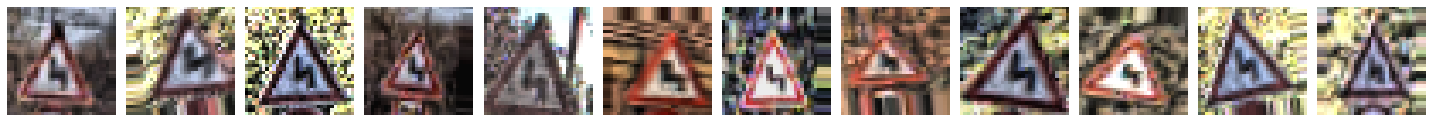

 51%|█████     | 22/43 [00:14<00:16,  1.25it/s]

[22] Bumpy road


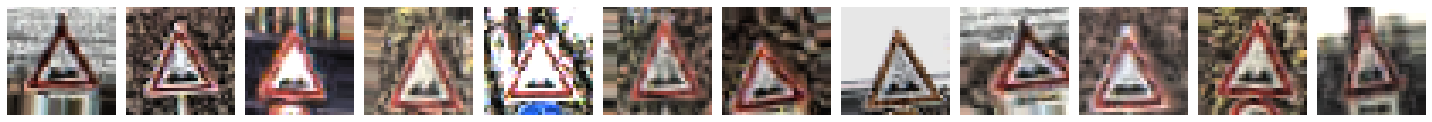

 53%|█████▎    | 23/43 [00:15<00:15,  1.32it/s]

[23] Slippery road


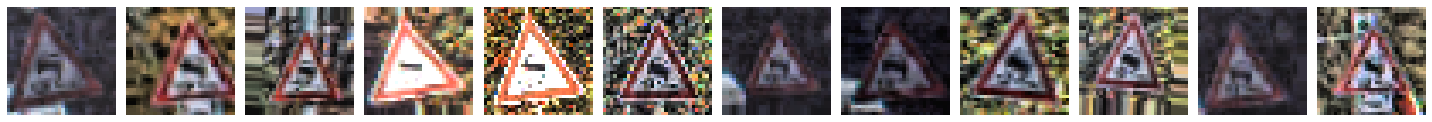

 56%|█████▌    | 24/43 [00:16<00:13,  1.43it/s]

[24] Road narrows on the right


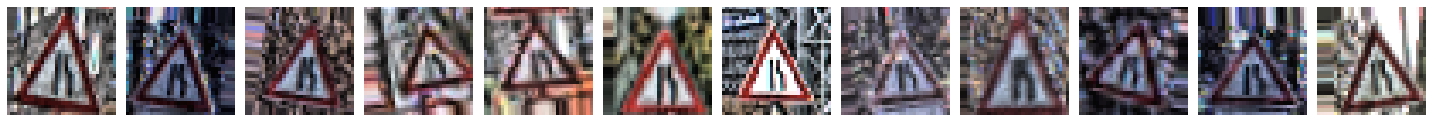

 58%|█████▊    | 25/43 [00:17<00:13,  1.37it/s]

[25] Road work


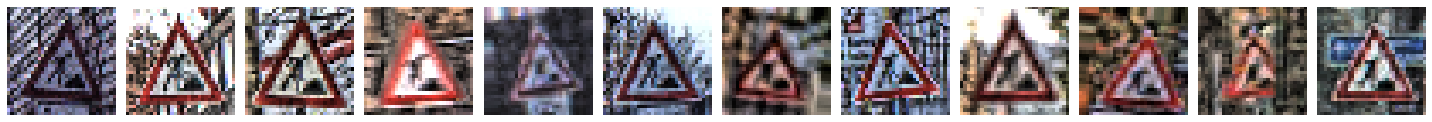

 60%|██████    | 26/43 [00:17<00:11,  1.48it/s]

[26] Traffic signals


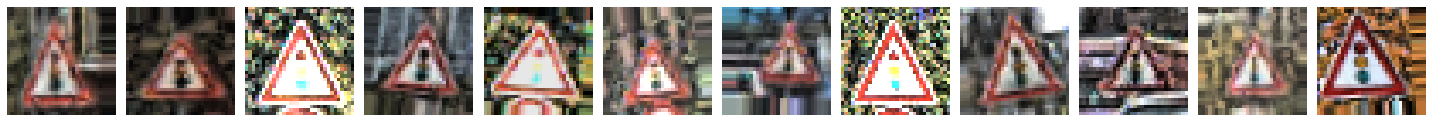

 63%|██████▎   | 27/43 [00:18<00:10,  1.56it/s]

[27] Pedestrians


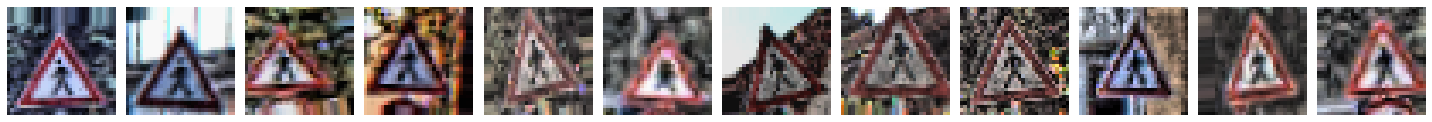

 65%|██████▌   | 28/43 [00:18<00:09,  1.55it/s]

[28] Children crossing


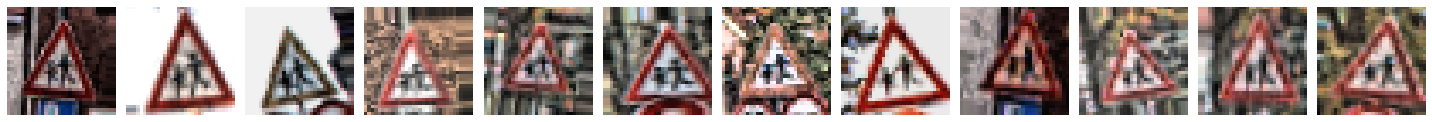

 67%|██████▋   | 29/43 [00:19<00:08,  1.61it/s]

[29] Bicycles crossing


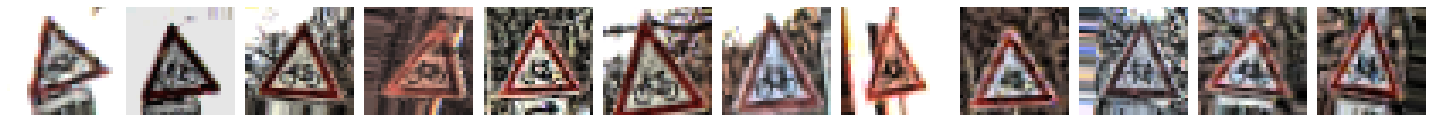

 70%|██████▉   | 30/43 [00:19<00:07,  1.67it/s]

[30] Beware of ice/snow


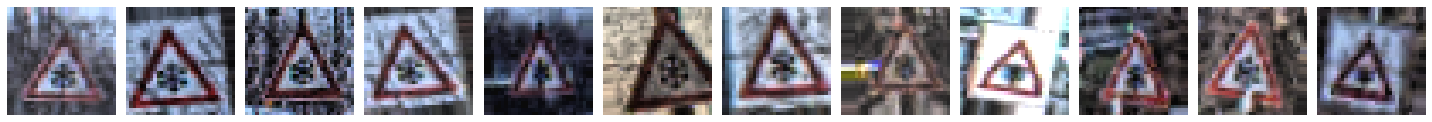

 72%|███████▏  | 31/43 [00:20<00:07,  1.55it/s]

[31] Wild animals crossing


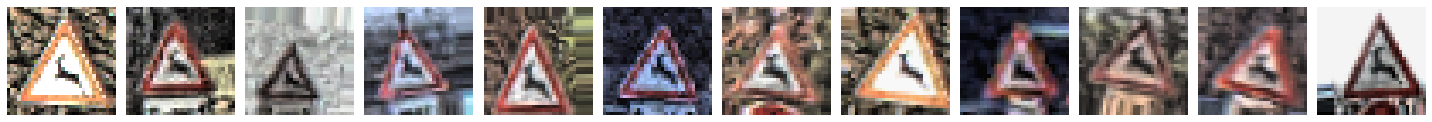

 74%|███████▍  | 32/43 [00:21<00:06,  1.59it/s]

[32] End speed + passing limits


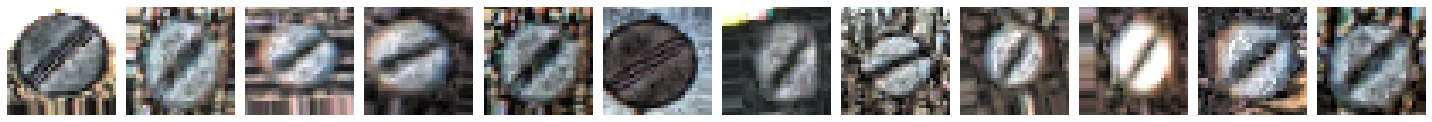

 77%|███████▋  | 33/43 [00:21<00:06,  1.65it/s]

[33] Turn right ahead


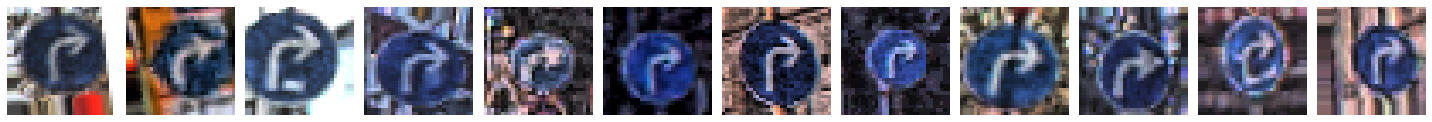

 79%|███████▉  | 34/43 [00:22<00:05,  1.69it/s]

[34] Turn left ahead


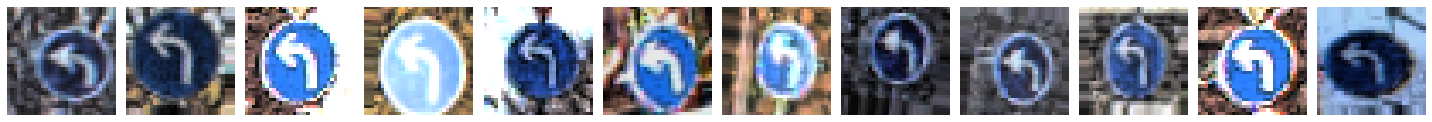

 81%|████████▏ | 35/43 [00:22<00:04,  1.72it/s]

[35] Ahead only


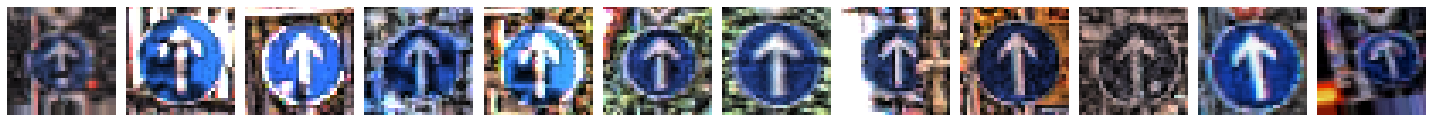

 84%|████████▎ | 36/43 [00:23<00:04,  1.59it/s]

[36] Go straight or right


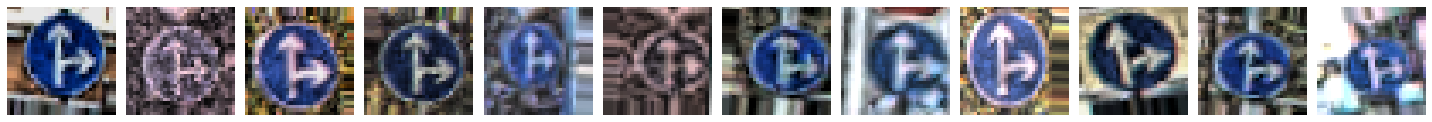

 86%|████████▌ | 37/43 [00:24<00:03,  1.55it/s]

[37] Go straight or left


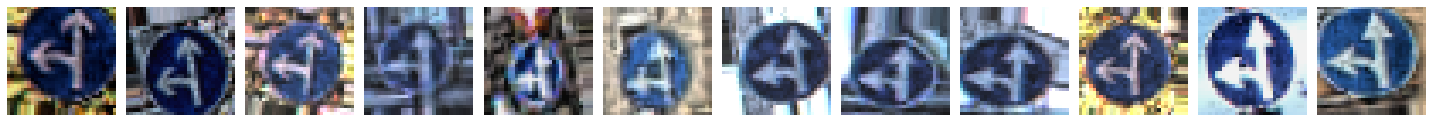

 88%|████████▊ | 38/43 [00:24<00:03,  1.57it/s]

[38] Keep right


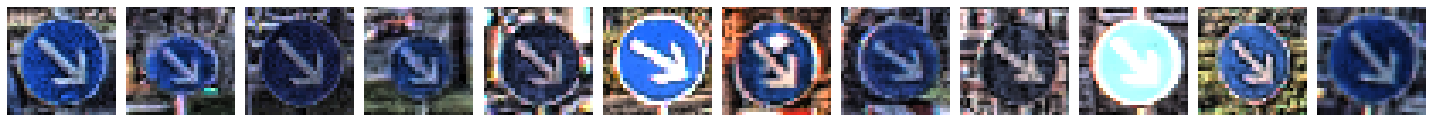

 91%|█████████ | 39/43 [00:25<00:02,  1.60it/s]

[39] Keep left


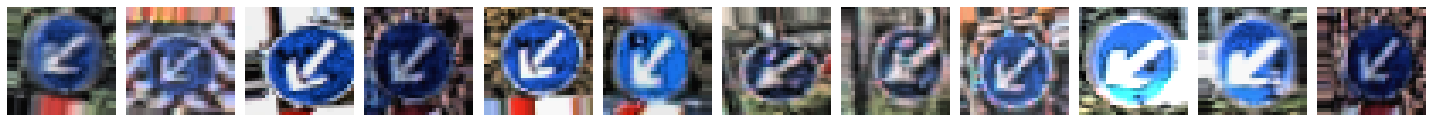

 93%|█████████▎| 40/43 [00:26<00:01,  1.67it/s]

[40] Roundabout mandatory


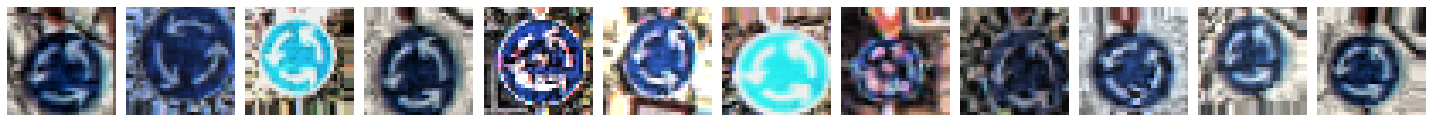

 95%|█████████▌| 41/43 [00:26<00:01,  1.57it/s]

[41] End of no passing


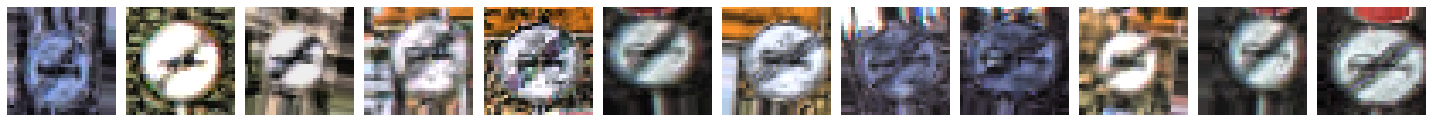

 98%|█████████▊| 42/43 [00:27<00:00,  1.65it/s]

[42] End no passing veh > 3.5 tons


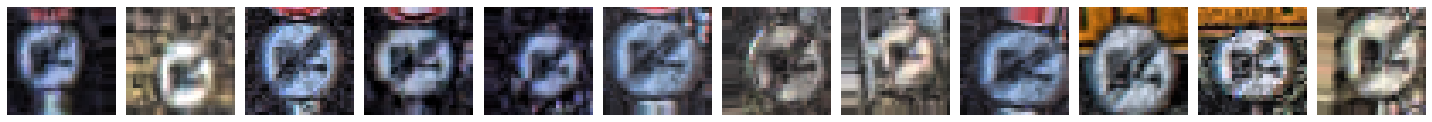

100%|██████████| 43/43 [00:27<00:00,  1.54it/s]


In [31]:
## Display a broader sample of AUGMENTED images, 12 from each class
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

images_labels = list(train_images_dict.keys())
for image_key in tqdm(sorted(images_labels)):        
    subplots = 12
    fig, axes = plt.subplots(1, subplots)
    images_total = len(train_images_dict[image_key])
    print('[{}] {}'.format(image_key, classes_name[image_key]))
    offset = images_total // subplots
    images = [train_images_dict[image_key][j * offset] for j in range(subplots)]
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image, interpolation = 'none')
        ax.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()

# <font color='crimson'>3. Grayscaling</font>

Converts an image with RGB channels into an image with a single grayscale channel.The value of each grayscale pixel is calculated as the weighted sum of the corresponding red, green and blue pixels as:

----
`Y = 0.2125 R + 0.7154 G + 0.0721 B`

----
These weights are used by CRT phosphors as they better represent human perception of red, green and blue than equal weights.
- https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html

## <font color='brown'>Grayscale Filter (BT709)</font>

In [34]:
# Create Grayscale training sets

from skimage import exposure, color, data
from sklearn.utils import shuffle

max_images_per_class = 2500
X_train_gray = np.empty((0, 32, 32, 1))
y_train_gray = np.empty(0, dtype = 'uint8')

print('Grayscaling Image Data...')
for i in tqdm(range(n_labels)):
    index = [y_train_aug == i]
    i_class_images = X_train_aug[y_train_aug == i]
    i_class_y = y_train_aug[y_train_aug == i]

    i_X_train_gray = []
    i_y_train_gray = []

    for ii in range(0, max_images_per_class):
        image_gray = np.dot(i_class_images[ii], [[0.2125], [0.7154], [0.0721]])
        i_X_train_gray.append(image_gray)
        i_y_train_gray.append(i_class_y[ii])

    X_train_gray = np.append(X_train_gray, np.asarray(i_X_train_gray), axis = 0)
    y_train_gray = np.append(y_train_gray, np.asarray(i_y_train_gray), axis = 0)              

X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)

print('\nGrayscaling Complete.')

  0%|          | 0/43 [00:00<?, ?it/s]

Grayscaling Image Data...


100%|██████████| 43/43 [00:28<00:00,  1.51it/s]



Grayscaling Complete.


In [35]:
print('Number of Grayscale images: ', X_train_gray.shape[0])
print('Verifying Image Shape: ', X_train_gray.shape[1:])

Number of Grayscale images:  107500
Verifying Image Shape:  (32, 32, 1)


100%|██████████| 43/43 [00:04<00:00, 10.25it/s]


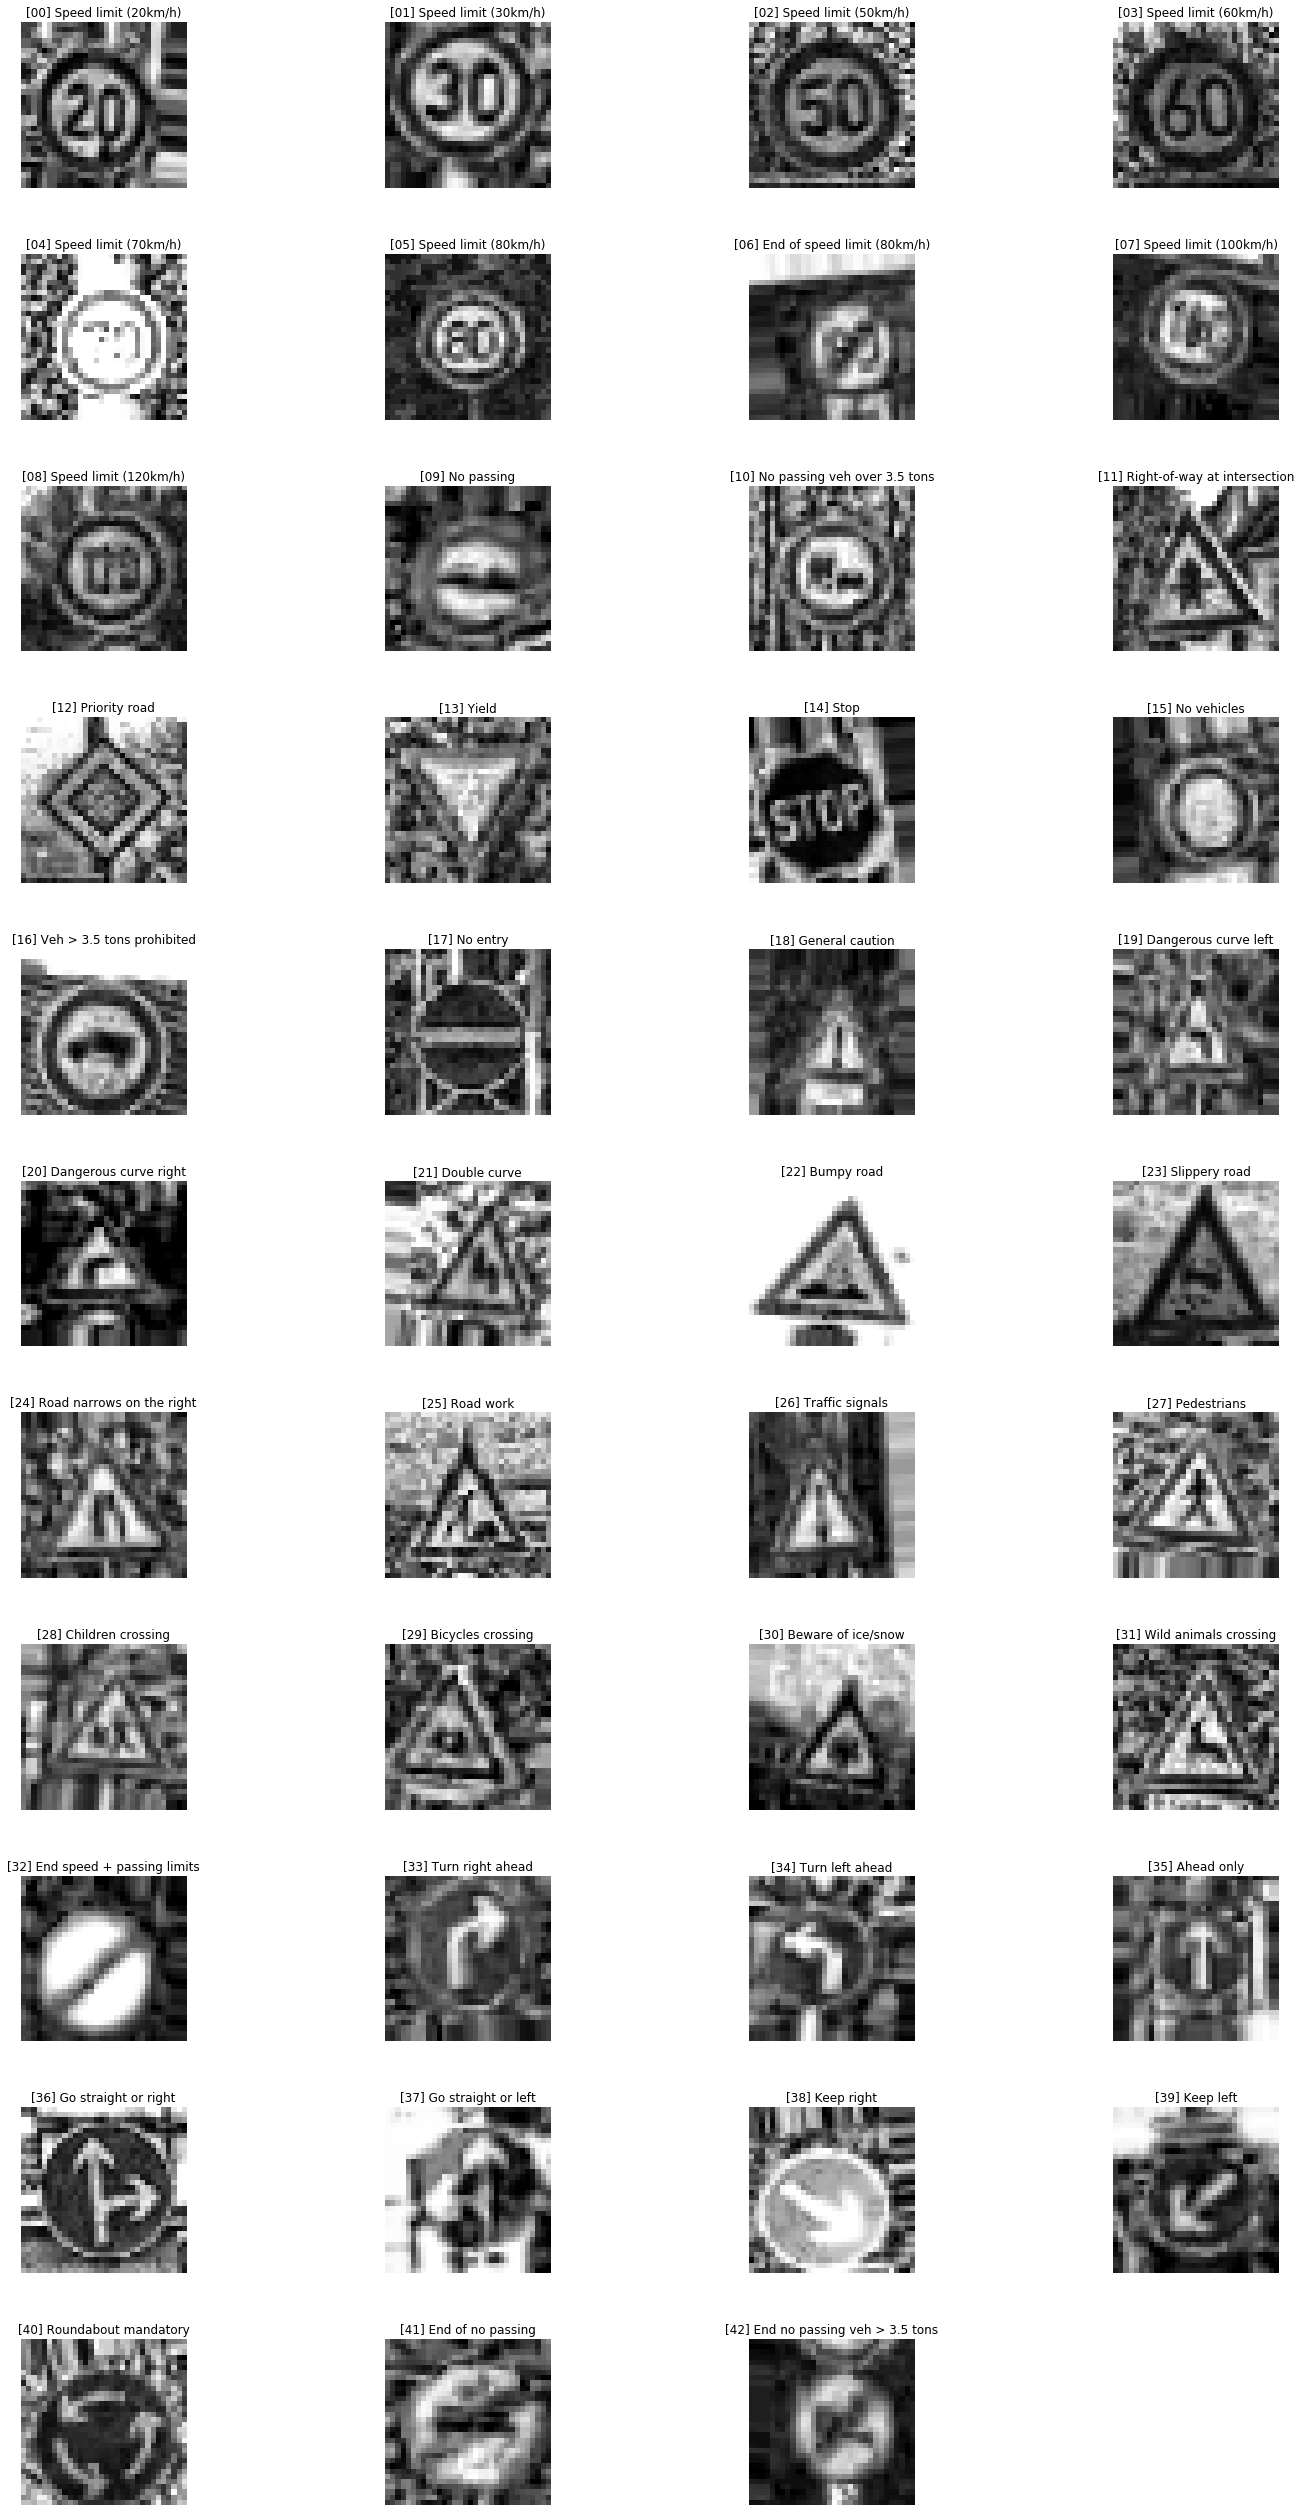

In [36]:
## Display sample of the GRAYSCALE training images, 1 image per class

fig = plt.figure(figsize = (22, 35), tight_layout={'h_pad': 5})

for i in tqdm(range(n_labels)):
    image_key = np.where(y_train_gray == i)
    img = X_train_gray[image_key[0][0]].squeeze()
    ax = fig.add_subplot(int(n_labels / 4) + 1, 4, i + 1) 
    ax.imshow(img, cmap = "gray", interpolation='none')
    plt.title("[%02d] %s" % (i, classes_name[i]))
    plt.axis('off')
    plt.tight_layout()
#plt.savefig('Grayscale_Training_Image_Plot.png', dpi = 300)

## <center><font color='DARKMAGENTA'>Displaying Original, Normalized (Adaptive Equalization) and Grayscaled Image</font></center>
---

Label index:  15
Label name:  No vehicles


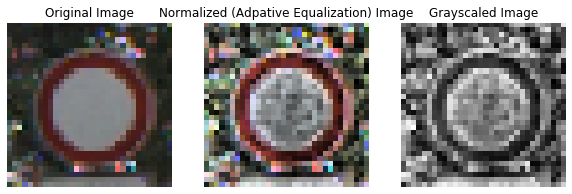

In [37]:
import random

index = random.randint(0, len(X_train_norm))

image_original = X_train[index].squeeze()
image_normalized = X_train_norm[index].squeeze()
image_grayscaled = np.dot(X_train_norm[index], [[0.2125], [0.7154], [0.0721]]).squeeze()

plt.figure(figsize=(10, 10))

plt.subplot2grid((1, 3), (0, 0));
plt.axis('off')
plt.title('Original Image')
plt.imshow(image_original, cmap="gray")

plt.subplot2grid((1, 3), (0, 1));
plt.axis('off')
plt.title('Normalized (Adpative Equalization) Image')
plt.imshow(image_normalized, cmap="gray")

plt.subplot2grid((1, 3), (0, 2));
plt.axis('off')
plt.title('Grayscaled Image')
plt.imshow(image_grayscaled, cmap="gray")

print('Label index: ', y_train[index])
print('Label name: ', classes_name[y_train[index]])

# <center><font color='MAROON'>Model Architecture</font></center>
---

## <font color='DARKMAGENTA'>1. LeNet-5</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/sfserq93?workspace=user-junth

## <font color='DARKMAGENTA'>2. LeNet-5 + Contrast Enhancement</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/kcebxhfe?workspace=user-junth

## <font color='DARKMAGENTA'>3. LeNet-5 + Contrast Enhancement + Augmentation(3000)</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/qc0c461b?workspace=user-junth

## <font color='DARKMAGENTA'>4. Deep LeNet-5 + Contrast Enhancement + Augmentation(3000)</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/zllcbd7m?workspace=user-junth

## <font color='DARKMAGENTA'>5. Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization</font>

https://app.wandb.ai/junth/traffic-sign-recognition-classifier/runs/2atxo1cf?workspace=user-junth

---

<font color='maroon'>Saved model is also available at:</font>

https://github.com/Junth19/Traffic-Signs-Recognition-System

---

## <font color='crimson'>Loading (Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization) saved model</font>

In [38]:
from keras.models import load_model

model = load_model('./Models/(5) Deep LeNet-5 + Contrast Enhancement + Augmentation(4500) + Regularization/DeepLeNet-5_CLAHE_AUG(v2).h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

## <font color='crimson'>Calculating Test Accuracy</font>

In [40]:
from keras.utils import to_categorical

path = os.path.join(current_path,'gtsrb-german-traffic-sign','Test.csv')
data = pd.read_csv(path)
X_test = X_test_norm.astype('float32')
y_test = to_categorical(data['ClassId'].values)

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

12630/12630 [==============================] - 17s 1ms/step
0.9712588787078857


## <font color='crimson'>Make predictions and explore </font>
<font color='maroon'>With the model trained, we can use it to make predictions about some images.</font>

In [42]:
# Batch of 32 images is taken for visualization
test_images = X_test[:32]
a = y_test[:32]
test_labels = [np.where(r==1)[0][0] for r in a]
predictions = model.predict(test_images)
print(predictions.shape)

(32, 43)


<font color='maroon'>Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:</font>

In [43]:
print(predictions[0])

[5.53347113e-23 2.25632895e-24 1.87222466e-25 9.91451331e-21
 7.06093698e-24 1.73483569e-19 3.34171611e-25 1.29416843e-14
 3.36282177e-14 6.92636270e-12 6.68180795e-20 2.20045792e-23
 3.40702204e-21 9.43295660e-30 1.93325006e-23 3.08632277e-14
 1.00000000e+00 1.02493296e-16 5.17179646e-28 1.67891713e-25
 2.17810965e-23 2.98830122e-35 4.32103401e-35 1.87172291e-27
 1.75476087e-37 2.45436388e-33 8.27349231e-29 7.77186460e-31
 1.30555851e-25 3.56675635e-29 5.66223027e-23 1.09792030e-31
 1.48616160e-18 1.81068843e-17 7.66892546e-18 2.18846348e-22
 3.59798525e-20 1.06000669e-19 9.87950818e-22 1.95187933e-23
 1.53011538e-14 2.11024243e-16 9.74331762e-21]


<font color='maroon'>A prediction is an array of 43 numbers. These describe the "confidence" of the model that the image corresponds to each of the 43 different traffic road signs. We can see which label has the highest confidence value:</font>

In [44]:
np.argmax(predictions[0])

16

<font color='maroon'>So the model is most confident that this image is a </font>`Veh > 3.5 tons prohibited`or `classes_name[16]`

In [45]:
test_labels[0]

16

In [46]:
classes_name[16]

'Veh > 3.5 tons prohibited'

## <font color='crimson'>Plot several images with their predictions (Softmax Probability)</font>
---

In [47]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes_name[predicted_label],
                                100*np.max(predictions_array),
                                classes_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(43), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

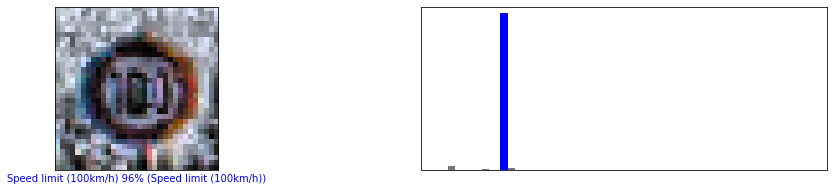

In [48]:
i = 13
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

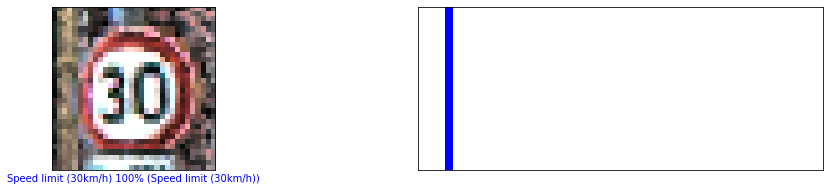

In [49]:
i = 1
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

---
<font color='maroon'>Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label.</font>

---

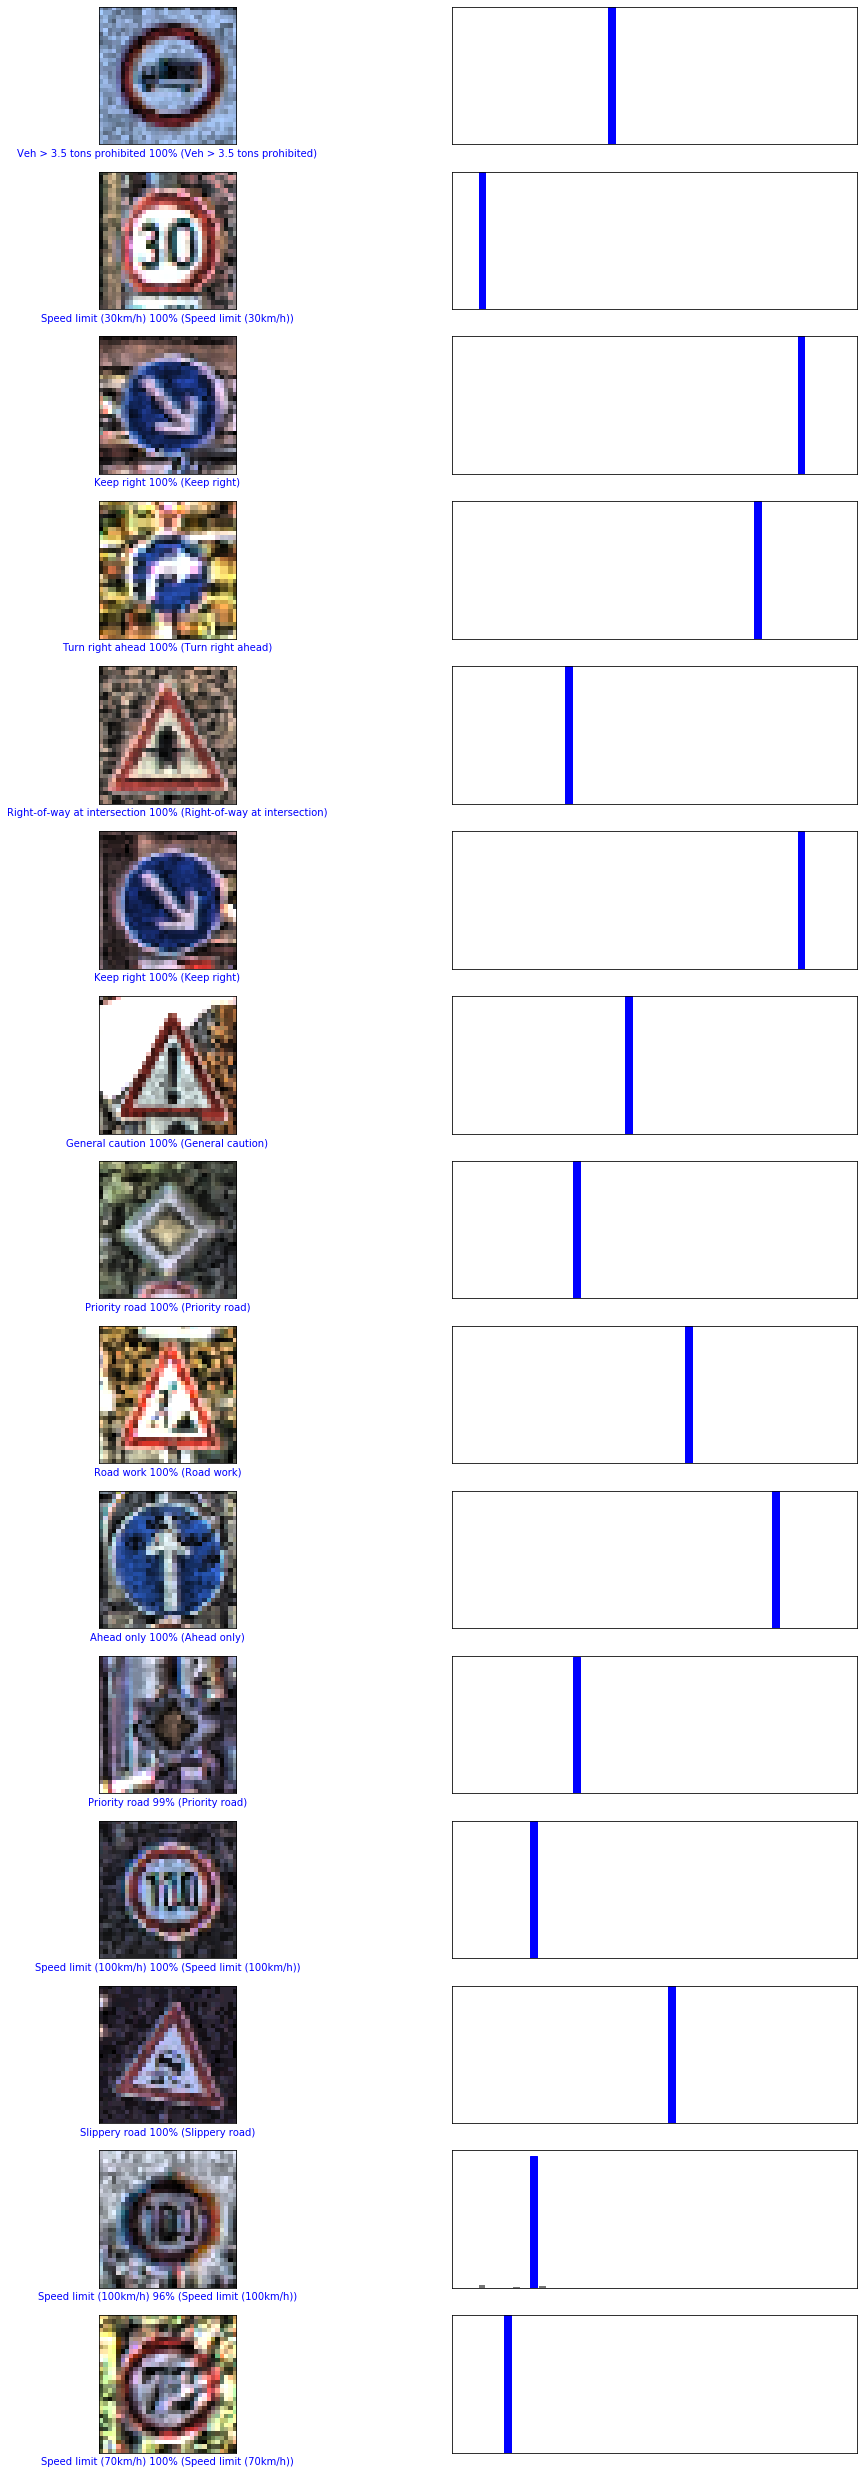

In [50]:
num_rows = 15
num_cols = 1
num_images = num_rows * num_cols
plt.figure(figsize=(4 * 4 * num_cols, 3 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)